In [1]:
import numpy as np
import numpy.random as r
import matplotlib.pyplot as plt
import scipy.special as sp
np.random.seed(42)

In [2]:
def adfibo(alpha, n, x):
    s = 0*x
    for i in range(int(np.ceil(alpha)),n+1):
        if (i+n)%2==0:
            s=s+0
        else:
            s=s+(sp.gamma((n+i+1)/2))/(sp.gamma(i-alpha+1)*sp.gamma((n-i+1)/2))*x**(i-alpha)
    return s

def Input(x,degree,alpha):
    inp_x = []
    for i in range(1,degree+1):
        inp_x.append(adfibo(alpha,i,x))
    return np.array([inp_x])

def Neural_Network(input,degree,alpha,weights):
    z=[]
    z.append(Input(input, degree, alpha))
    z.append(np.dot(z[0],weights.T))
    return z[1], z[0]

def function(x):
    return 2+4*np.sqrt(x/np.pi)+x**2

In [3]:
def prob(input,alpha,degree,weights):
    tri_w = np.zeros_like(weights)
    h = np.zeros((len(weights[0]),len(weights[0])))
    error1  = 0
    error2  = 0
    z_int, dw_int = Neural_Network(0,degree,0,weights)
    z_int2, dw_int2 = Neural_Network(0,degree,1,weights)
    for l in input:
        z, dw = Neural_Network(l,degree,0,weights)
        z_alp, dw_alp = Neural_Network(l,degree,alpha,weights)
        z_1, dw_1 = Neural_Network(l,degree,2,weights)
        
        tri_w =tri_w +2*(z_1+z_alp+z-function(l))*(dw_1+dw_alp+dw)
        
        for i in range(len(weights[0])):
                 for j in range(len(weights[0])):
                     h[i,j]=h[i,j]+2*(dw_1[0,i]+dw_alp[0,i]+dw[0,i])*(dw_1[0,j]+dw_alp[0,j]+dw[0,j])
    
        error1=error1+(z_1+z_alp+z-function(l))**2
        error2=error2+(z_1+z_alp+z-function(l))**2
        
    tri_w = tri_w/(2*len(input)) + (z_int)*dw_int + (z_int2)*dw_int2
    for i in range(len(weights[0])):
                 for j in range(len(weights[0])):
                      h[i,j]=h[i,j]/(2*len(input))+ dw_int[0,i]*dw_int[0,j] + dw_int2[0,i]*dw_int2[0,j]
                     
    error1=error1/(2*len(input)) +1/2*(z_int)**2+1/2*(z_int2)**2
        
    return error1, error2/(2*len(input)),tri_w,h


def feed_farward(input,alpha, degree,accuracy,iter):
    w = r.random_sample((1,degree))
    k=0
    lem = 10**4
    while k<iter:
        error1,error2, tri_w, h,  = prob(input,alpha,degree,w)
        
        if error1<accuracy:
            break
        else:
            w_next = w.T - np.dot(np.linalg.inv(h+lem*np.identity(len(h))),tri_w.T)
            error11,error22,_,_ = prob(input,alpha,degree,w_next.T)
            
            if error11<error1:
                w = w_next.T
                k= k+1
                lem = lem/4
                print(f"Number of iteration is {k} and error is {error11}") 
            else:
                lem = 2*lem
                print(f"lemda is increasing {lem}") 
                print(f"lemda is increasing {lem}")
                if lem>10**(20):
                     break
            
    return w, error11, error22

In [4]:
#input = np.linspace(0,1,11)
input  = np.random.random_sample(10)


degree = 4

w , error1, error2 = feed_farward(input,1.50,degree,10**(-31),500) 

Number of iteration is 1 and error is [[3.90062756]]
Number of iteration is 2 and error is [[3.69434156]]
Number of iteration is 3 and error is [[3.0200066]]
Number of iteration is 4 and error is [[1.65433941]]
Number of iteration is 5 and error is [[0.72661837]]
Number of iteration is 6 and error is [[0.54435639]]
Number of iteration is 7 and error is [[0.33499386]]
Number of iteration is 8 and error is [[0.07828784]]
Number of iteration is 9 and error is [[0.00304266]]
Number of iteration is 10 and error is [[1.44113921e-05]]
Number of iteration is 11 and error is [[9.46019458e-09]]
Number of iteration is 12 and error is [[6.32165709e-13]]
Number of iteration is 13 and error is [[3.01183839e-18]]
Number of iteration is 14 and error is [[9.19513078e-25]]
Number of iteration is 15 and error is [[1.1624821e-31]]
lemda is increasing 1.862645149230957e-05
lemda is increasing 1.862645149230957e-05
lemda is increasing 3.725290298461914e-05
lemda is increasing 3.725290298461914e-05
lemda is 

In [5]:
def Nsol(Input,degree, weights):
    NumSol = []

    for i in Input:
        z1, z2 = Neural_Network(i,degree,0,weights)
        NumSol.append(z1[0,0])
    return NumSol

def Exsol(t):
    sol  = t**2
    return sol


input_plot = np.linspace(0,1,101)

exacSol = Exsol(input_plot)
NumSol = Nsol(input_plot, degree, w)

error=abs(NumSol-exacSol)

relative_error = [error[i]/exacSol[i] if exacSol[i] != 0 else 0 for i in range(len(input_plot))]

In [6]:
alphas = [1.25, 1.50, 1.75,2.0]

solutions = []

input_for_plot = np.linspace(0,1,101)

#solutions.append(Nsol(input_for_plot, degree, w))

for i in alphas:
    weight, error1, error2 = feed_farward(input,i, degree,10**(-31),500)
    w = weight
    solutions.append(Nsol(input_for_plot, degree, w))

    print(f"For alpha {i} solution is calculated")

Number of iteration is 1 and error is [[2.35545701]]
Number of iteration is 2 and error is [[2.27276665]]
Number of iteration is 3 and error is [[1.99544029]]
Number of iteration is 4 and error is [[1.38524355]]
Number of iteration is 5 and error is [[0.848018]]
Number of iteration is 6 and error is [[0.5655187]]
Number of iteration is 7 and error is [[0.32007934]]
Number of iteration is 8 and error is [[0.12041538]]
Number of iteration is 9 and error is [[0.01598968]]
Number of iteration is 10 and error is [[0.00055462]]
Number of iteration is 11 and error is [[0.00022846]]
Number of iteration is 12 and error is [[0.00022789]]
Number of iteration is 13 and error is [[0.00022789]]
Number of iteration is 14 and error is [[0.00022789]]
Number of iteration is 15 and error is [[0.00022789]]
lemda is increasing 1.862645149230957e-05
lemda is increasing 1.862645149230957e-05
lemda is increasing 3.725290298461914e-05
lemda is increasing 3.725290298461914e-05
lemda is increasing 7.450580596923

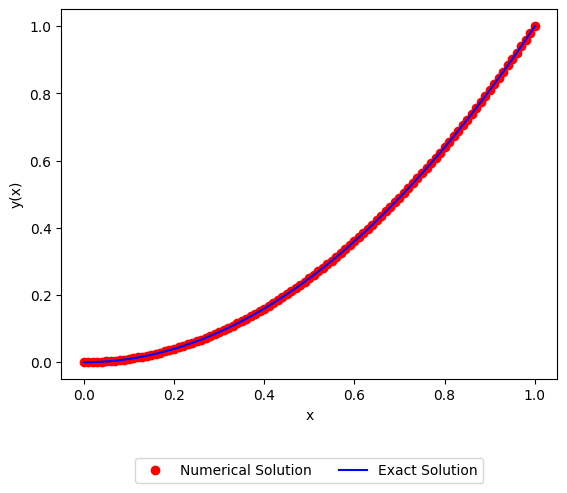

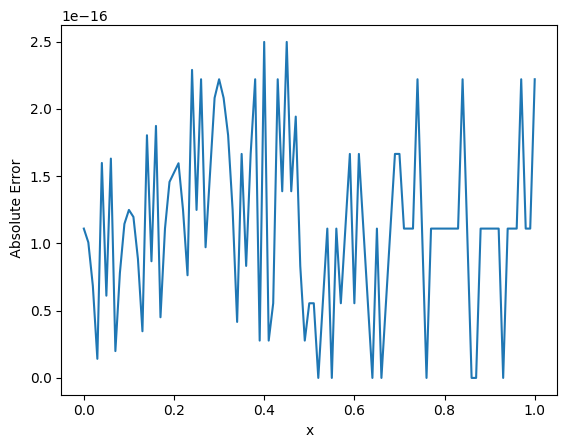

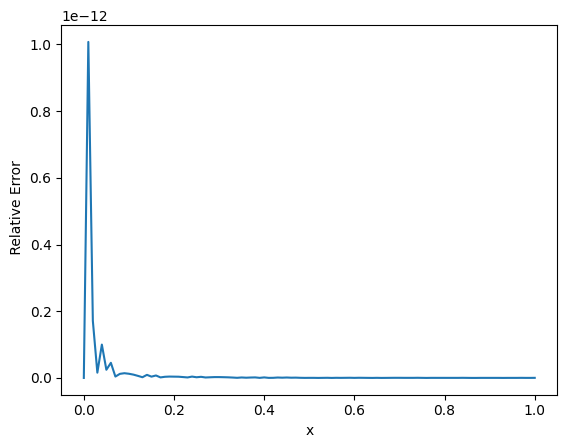

In [7]:
plt.plot(input_plot,NumSol, 'or',label="Numerical Solution")
plt.plot(input_plot, exacSol, '-b',label="Exact Solution")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3),ncol=5, fancybox=True)    
#plt.savefig('line_plot.pdf',bbox_inches='tight')
plt.show()

plt.plot(input_plot, error)
plt.xlabel("x")
plt.ylabel(" Absolute Error")
#plt.savefig('pic3.pdf',bbox_inches='tight')  
plt.show()

plt.plot(input_plot, relative_error)
plt.xlabel("x")
plt.ylabel(" Relative Error")
plt.savefig('relative.png')  
plt.show()

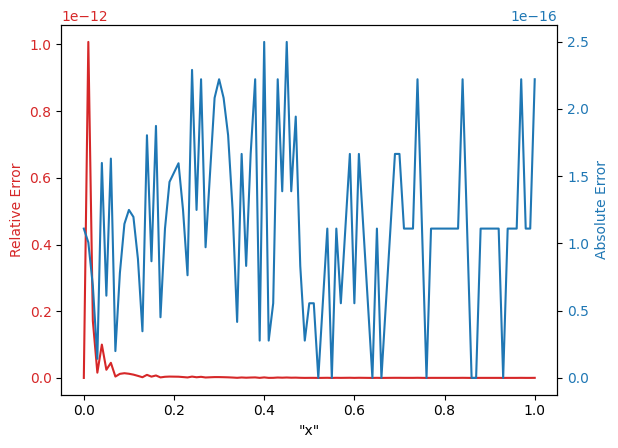

In [8]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('"x"')
ax1.set_ylabel('Relative Error', color=color, )
ax1.plot(input_plot, relative_error, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Absolute Error', color=color)  # we already handled the x-label with ax1
ax2.plot(input_plot, error, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.savefig('error.png')
plt.show()

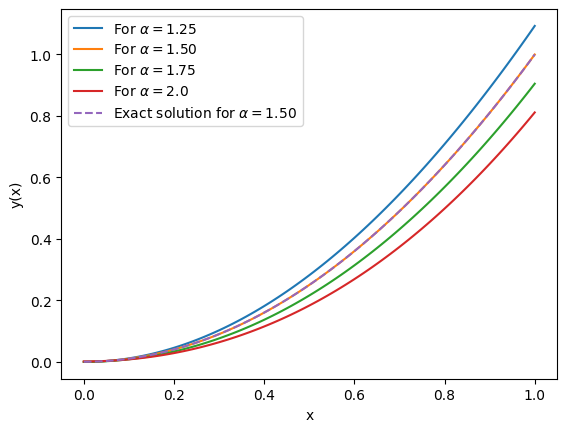

In [9]:
plt.plot(input_for_plot, solutions[0], label="For $\\alpha=1.25$")
plt.plot(input_for_plot, solutions[1], label="For $\\alpha=1.50$")
plt.plot(input_for_plot, solutions[2], label="For $\\alpha=1.75$")
plt.plot(input_for_plot, solutions[3], label="For $\\alpha=2.0$")
plt.plot(input_plot, Exsol(input_plot), linestyle="--",  label="Exact solution for $\\alpha=1.50$ ")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend()    
plt.savefig('solution.png')
plt.show()

In [10]:
print("")
print( np.array([error[j] for j in range(0,101,10)])) 
print(" ")


[1.11022302e-16 1.24900090e-16 1.52655666e-16 2.22044605e-16
 2.49800181e-16 5.55111512e-17 5.55111512e-17 1.66533454e-16
 1.11022302e-16 1.11022302e-16 2.22044605e-16]
 
